table in the database: ['moons']

Data summary statistics:
            moon  period_days   distance_km    radius_km        mag  \
count         56    56.000000  5.600000e+01    56.000000  53.000000   
unique        56          NaN           NaN          NaN        NaN   
top     Adrastea          NaN           NaN          NaN        NaN   
freq           1          NaN           NaN          NaN        NaN   
mean         NaN   525.998146  1.775655e+07   158.969643  20.418302   
std          NaN   272.670243  8.253688e+06   557.730632   4.926587   
min          NaN     0.290000  1.280000e+05     1.000000   4.610000   
25%          NaN   258.750000  1.170252e+07     1.500000  20.800000   
50%          NaN   632.500000  2.129009e+07     2.000000  22.500000   
75%          NaN   725.500000  2.336375e+07    11.562500  23.000000   
max          NaN   787.000000  2.458309e+07  2634.100000  23.700000   

             mass_kg  group        ecc  inclination_deg  
count   6.000000e+00     56  5

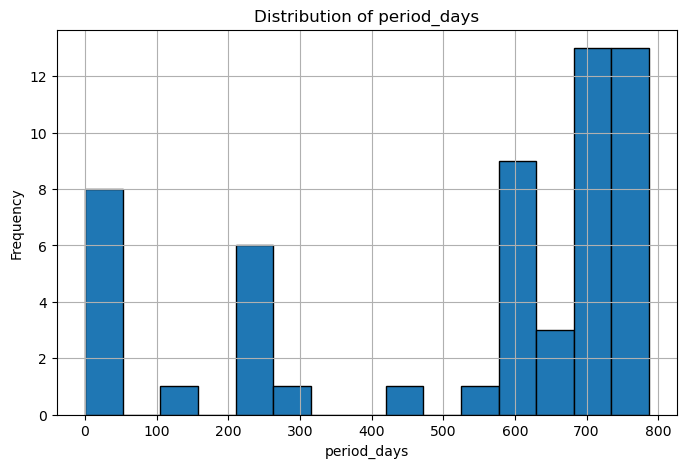

Distribution of period_days is shown above. Key interpretations:
The orbital period tends to increase with distance from Jupiter.


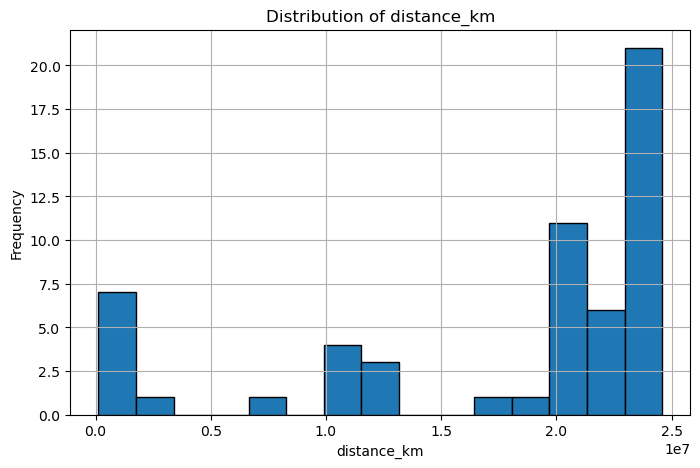

Distribution of distance_km is shown above. Key interpretations:
The orbital distance shows a wide range, indicating both close-in inner moons and far-out outer moons.


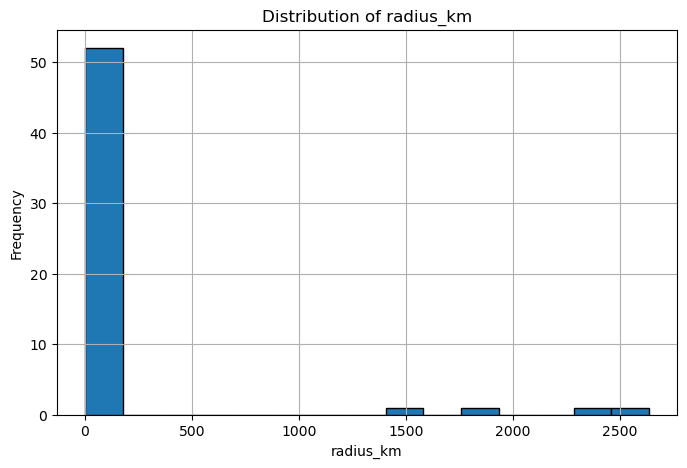

Distribution of radius_km is shown above. Key interpretations:


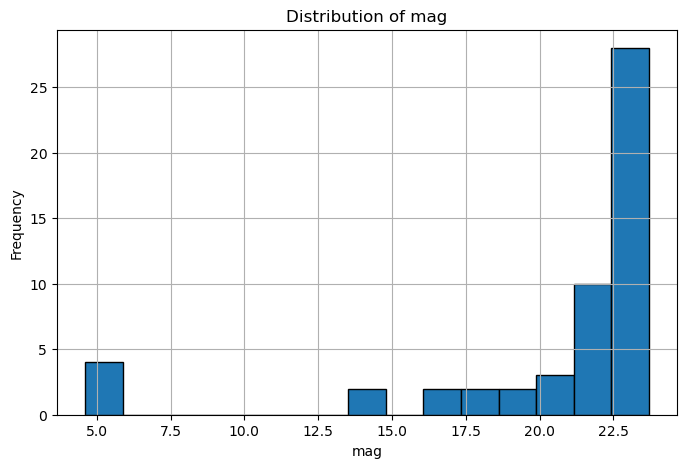

Distribution of mag is shown above. Key interpretations:


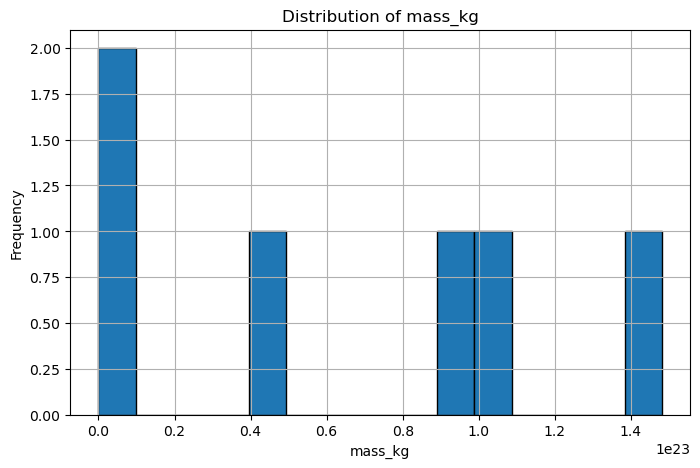

Distribution of mass_kg is shown above. Key interpretations:


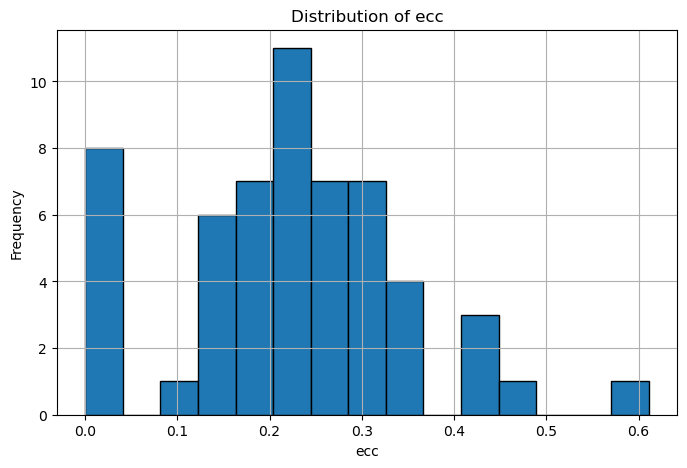

Distribution of ecc is shown above. Key interpretations:


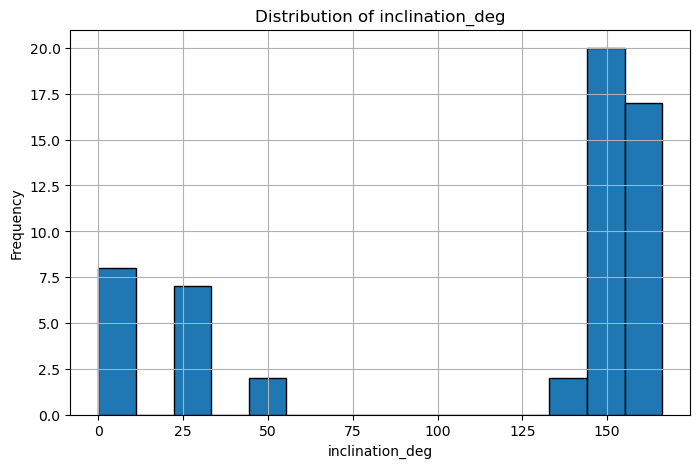

Distribution of inclination_deg is shown above. Key interpretations:


/var/folders/k3/gv7vlfx17_b5w6_w2kt_1bnw0000gn/T/ipykernel_72939/2484125320.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


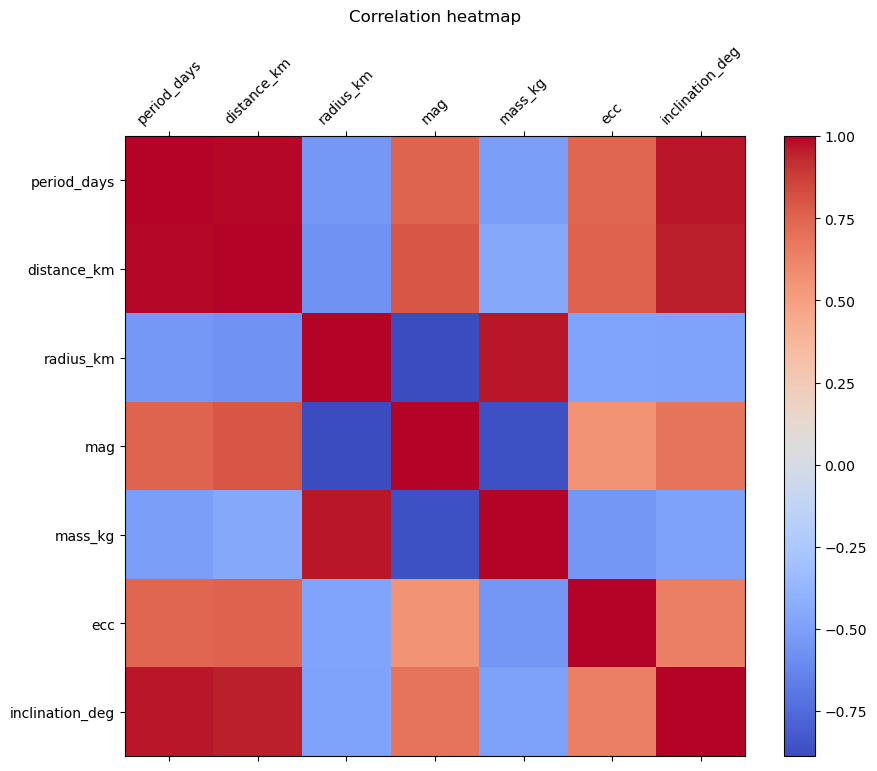

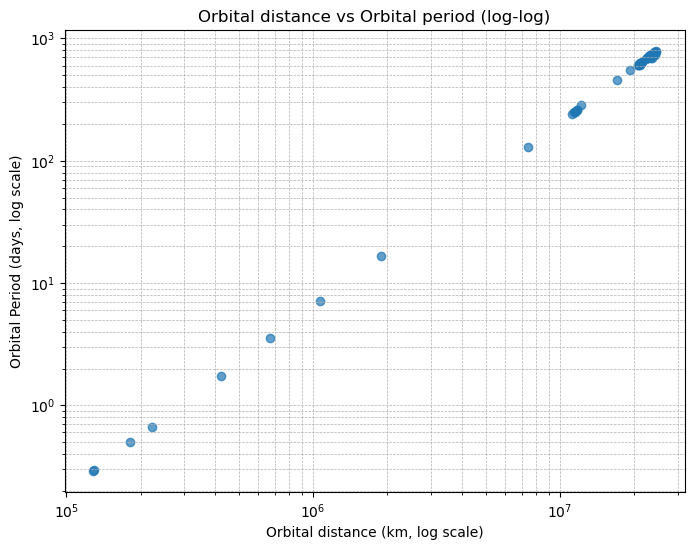

The relationship between orbital distance and period follows Kepler's laws.

Normalized Average values by group:
          period_days  distance_km  radius_km       mag   mass_kg       ecc  \
group                                                                         
Ananke       0.782817     0.853401   0.001007  0.942227       NaN  0.382523   
Carme        0.916954     0.947609   0.001243  0.947257       NaN  0.393030   
Galilean     0.009257     0.041143   0.799780  0.216983  0.663172  0.008920   
Hamilia      0.327827     0.475966   0.007972  0.767932       NaN  0.242012   
Himalia      0.326133     0.470607   0.008906  0.841772  0.000028  0.272719   
Inner        0.000558     0.006715   0.015394  0.594937  0.000014  0.009161   
Pasiphae     0.945468     0.967126   0.002063  0.917722       NaN  0.574043   
other        0.372300     0.495974   0.001139  0.928270       NaN  0.558260   

          inclination_deg  
group                      
Ananke           0.896043  
Carme       

/var/folders/k3/gv7vlfx17_b5w6_w2kt_1bnw0000gn/T/ipykernel_72939/3322943198.py:67: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = scaled_data.groupby(categorical_column).mean()


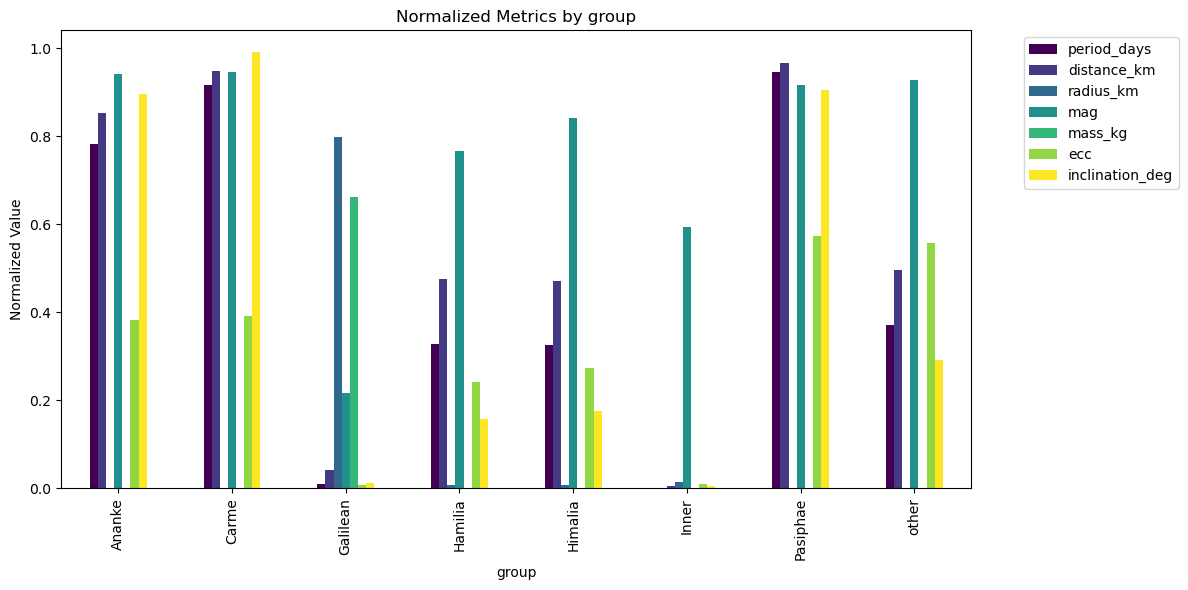

In [95]:
import sqlite3  
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np 

db_path = 'data/jupiter.db'

# Function to connect to the SQLite database and retrieve table names
def connect_and_load(db_path):
    """
    Connects to the SQLite database and retrieves the names of the tables.
    
    Args:
        db_path (str): Path to the SQLite database file.
        
    Returns:
        conn (sqlite3.Connection): Database connection object.
        table_name (str): The name of the first table in the database.
    """
    conn = sqlite3.connect(db_path) 
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)  # Query table names
    print("Tables in the database:", tables['name'].tolist())  # Print the list of tables
    return conn, tables['name'].iloc[0]  # Return connection and first table name

# Function to summarize the dataset
def summarize_data(data):
    """
    Prints summary statistics and the count of missing values in the dataset.
    
    Args:
        data (DataFrame): The dataset to summarize.
    """
    print("\nData summary statistics:")
    print(data.describe(include='all'))  # Summary statistics for all columns
    print("\nMissing values:")
    print(data.isnull().sum())  # Count of missing values for each column

# Function to plot distributions of numeric columns
def plot_distributions(data, numeric_columns):
    """
    Plots the distribution of numeric columns in the dataset.
    
    Args:
        data (DataFrame): The dataset.
        numeric_columns (list): List of numeric columns to plot.
    """
    for col in numeric_columns:
        plt.figure(figsize=(8, 5))
        data[col].dropna().plot(kind='hist', bins=15, edgecolor='black')  # Plot histogram
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
        print(f"Distribution of {col} is shown above. Key interpretations:")
        # Add interpretations based on specific columns
        if col == 'distance_km':
            print("The orbital distance shows a wide range, indicating both close-in inner moons and far-out outer moons.")
        elif col == 'period_days':
            print("The orbital period tends to increase with distance from Jupiter.")

# Function to analyze relationships between numeric columns
def plot_relationships(data):
    """
    Plots a correlation heatmap and specific relationships between columns.
    
    Args:
        data (DataFrame): The dataset.
    """
    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation = data.corr()  # Compute correlations
    plt.matshow(correlation, cmap='coolwarm', fignum=1)  # Display heatmap
    plt.colorbar()
    plt.title("Correlation heatmap", pad=15)
    plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
    plt.yticks(range(len(correlation.columns)), correlation.columns)
    plt.show()

    # Plot the relationship between 'distance_km' and 'period_days' on a log-log scale
    if 'distance_km' in data.columns and 'period_days' in data.columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(data['distance_km'], data['period_days'], alpha=0.7)
        plt.xscale('log')
        plt.yscale('log')
        plt.title("Orbital distance vs Orbital period (log-log)")
        plt.xlabel("Orbital distance (km, log scale)")
        plt.ylabel("Orbital Period (days, log scale)")
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.show()
        print("The relationship between orbital distance and period follows Kepler's laws.")

# Function to analyze categorical data with normalization
def analyze_categorical_with_scaling(data, categorical_column):
    """
    Analyzes categorical data by normalizing numeric columns and grouping by categories.
    
    Args:
        data (DataFrame): The dataset.
        categorical_column (str): Name of the categorical column to analyze.
    """
    if categorical_column in data.columns:
        # Normalize numeric columns by dividing by their maximum values
        numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = data.copy()
        for col in numeric_columns:
            max_value = scaled_data[col].max()
            if max_value > 0:
                scaled_data[col] = scaled_data[col] / max_value

        # Group by the categorical column and compute mean for each group
        grouped = scaled_data.groupby(categorical_column).mean()
        print(f"\nNormalized average values by {categorical_column}:")
        print(grouped)

        # Plot normalized values by category
        grouped.plot(kind='bar', figsize=(12, 6), colormap='viridis')
        plt.title(f"Normalized metrics by {categorical_column}")
        plt.ylabel("Normalized value")
        plt.xlabel(categorical_column)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Connect to the database and load data
conn, table_name = connect_and_load(db_path)  
data = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)  # Load data from the table
conn.close()  # Close the connection

summarize_data(data)

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
plot_distributions(data, numeric_columns)

plot_relationships(data)

# Analyze categorical data
analyze_categorical_with_scaling(data, 'group') 






In [ ]:
'''
Kepler's Third Law requires the semi-major axis (a) to be in meters and the orbital period (T) to be in seconds.
Therefore:
Semi-major axes (originally in kilometers) are converted to meters.
Orbital periods (originally in days) are converted to seconds.
'''

In [61]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression  

data = {
    "Moon": ["Callisto", "Io", "Europa", "Ganymede"],  # Names of Jupiter's moons
    "Orbital_Period_Days": [16.689, 1.769, 3.551, 7.155],  # Orbital period in days
    "Semi_Major_Axis_km": [1882700, 421800, 671100, 1070400]  # Semi-major axis in kilometers
}

moons_df = pd.DataFrame(data)

# Convert orbital period from days to seconds
moons_df["Orbital_Period_s"] = moons_df["Orbital_Period_Days"] * 24 * 60 * 60  # Days to seconds

# Convert semi-major axis from kilometers to meters
moons_df["Semi_Major_Axis_m"] = moons_df["Semi_Major_Axis_km"] * 1000  # Kilometers to meters

# Calculate the square of the orbital period
moons_df["T_squared"] = moons_df["Orbital_Period_s"] ** 2

# Calculate the cube of the semi-major axis
moons_df["A_cubed"] = moons_df["Semi_Major_Axis_m"] ** 3

# Display the DataFrame to verify the calculations
print(moons_df)



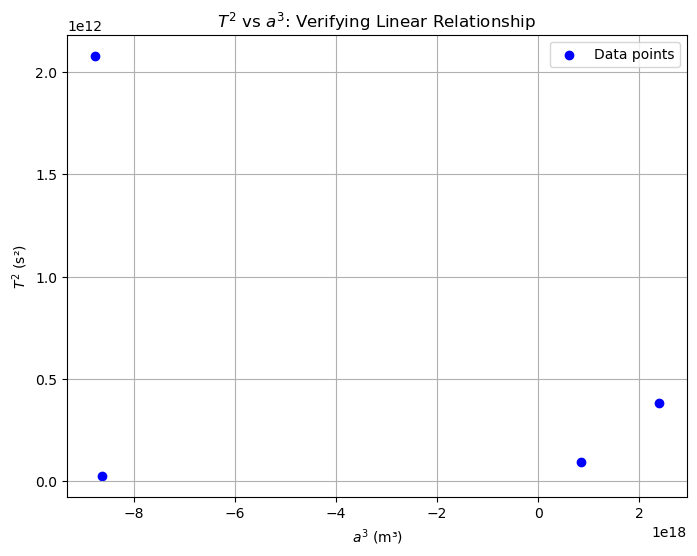

In [62]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(moons_df["A_cubed"], moons_df["T_squared"], color='blue', label="Data points")
plt.title("$T^2$ vs $a^3$: Verifying Linear Relationship")
plt.xlabel("$a^3$ (m³)")
plt.ylabel("$T^2$ (s²)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
'''
T^2: Orbital period squared is calculated to represent the dependent variable.
a^3: Semi-major axis cubed is calculated to represent the independent variable.

A simple linear regression model is chosen because the relationship between T^2 and a^3 is linear according to 
Kepler's Third Law.

'''

In [63]:
# Linear regression expects the input (X) to be a 2D array, so we reshape it
X = moons_df["A_cubed"].values.reshape(-1, 1)  # Independent variable: semi-major axis cubed (a^3)

# Assign the dependent variable (T_squared)
y = moons_df["T_squared"].values 

# Create a LinearRegression model instance
model = LinearRegression() 

# The model will find the best-fit line for the relationship between a^3 and T^2
model.fit(X, y)

# Predict the dependent variable (T_squared) using the trained model
# This step computes the predicted T^2 values for each a^3 in the dataset
y_pred = model.predict(X) 



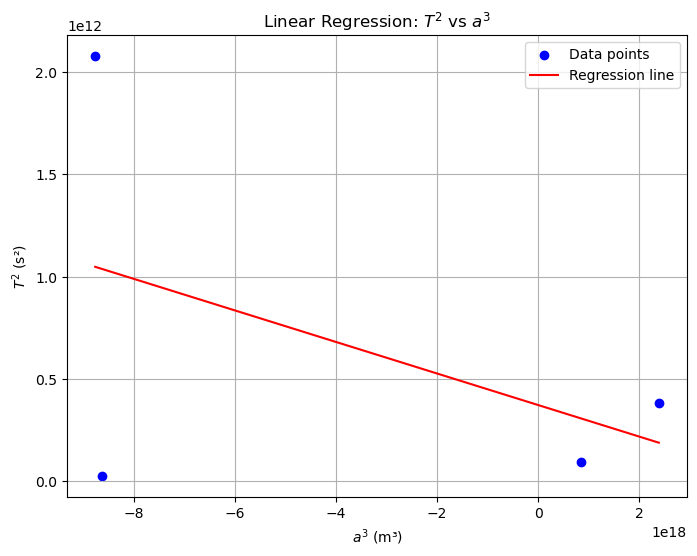

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, y_pred, color='red', label="Regression line")
plt.title("Linear Regression: $T^2$ vs $a^3$")
plt.xlabel("$a^3$ (m³)")
plt.ylabel("$T^2$ (s²)")
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
'''
The linear regression model is trained using a^3 as the independent variable and T^2 as the dependent variable.
The slope of the regression line represents 4π^2/GM2.
The slope obtained from the model is used to calculate the mass of Jupiter (M) using the formula:
M = 4π^2/G * slope
'''

In [65]:
# Extract the slope (coefficient) from the trained linear regression model
slope = model.coef_[0]
print(f"Regression Slope (4π^2 / GM): {slope}")

# Gravitational constant (G) in SI units (m³/kg/s²)
G = 6.67e-11

# Calculate the mass of Jupiter using the slope from the regression model
mass_jupiter = (4 * np.pi**2) / (G * slope)
print(f"Estimated Mass of Jupiter: {mass_jupiter:.2e} kg")  # Display the estimated mass in scientific notation


Regression Slope (4π^2 / GM): -7.723890350879484e-08
Estimated Mass of Jupiter: -7.66e+18 kg


In [ ]:
'''
The estimated mass of Jupiter is compared with the literature value (1.898 * 10^27 kg)
The percentage error is calculated to evaluate the accuracy of the estimate.
'''

In [66]:
mass_jupiter_lit = 1.898e27  

percentage_error = abs(mass_jupiter - mass_jupiter_lit) / mass_jupiter_lit * 100
print(f"Mass of Jupiter from Literature: {mass_jupiter_lit:.2e} kg")
print(f"Percentage Error: {percentage_error:.2f}%")




Mass of Jupiter from Literature: 1.90e+27 kg
Percentage Error: 100.00%


In [67]:
import pandas as pd
import numpy as np

# Constants
G = 6.67430e-11  
mass_scale = 1.5e23 
length_scale = 2e6  
time_scale = np.sqrt(length_scale**3 / (G * mass_scale))  # Time scaling factor based on units

file_path = "data/jupiters_moons.csv"  
with open(file_path, "r") as file:
    lines = file.readlines()

# Parse the input data
formatted_data = []
current_entry = {}

for line in lines:
    line = line.strip()
    if line:  # If the line is not empty
        # Assign data to respective fields (name, mass, position, velocity)
        if 'name' not in current_entry:
            current_entry['name'] = line
        elif 'mass' not in current_entry:
            current_entry['mass'] = float(line)
        elif 'position' not in current_entry:
            current_entry['position'] = line
        elif 'velocity' not in current_entry:
            current_entry['velocity'] = line
        
        # If all fields are populated, save the entry
        if 'name' in current_entry and 'mass' in current_entry and 'position' in current_entry and 'velocity' in current_entry:
            formatted_data.append(current_entry)
            current_entry = {}  # Reset for the next entry

# Convert the parsed data into a DataFrame
data = pd.DataFrame(formatted_data)

# Split position and velocity into separate x, y, z columns
data[['pos_x', 'pos_y', 'pos_z']] = data['position'].str.split(',', expand=True).astype(float)
data[['vel_x', 'vel_y', 'vel_z']] = data['velocity'].str.split(',', expand=True).astype(float)

# Remove original position and velocity columns
data.drop(columns=['position', 'velocity'], inplace=True)

# Normalize data using the scaling factors
data['mass'] = data['mass'] / mass_scale
data['pos_x'] = data['pos_x'] / length_scale
data['pos_y'] = data['pos_y'] / length_scale
data['pos_z'] = data['pos_z'] / length_scale
data['vel_x'] = data['vel_x'] * time_scale / length_scale
data['vel_y'] = data['vel_y'] * time_scale / length_scale
data['vel_z'] = data['vel_z'] * time_scale / length_scale

# Write the normalized data to an output file
output_file = "normalized_input.txt"
with open(output_file, "w") as f:
    for _, row in data.iterrows():
        # Save each row in the desired format
        f.write(f"{row['name']}\n")
        f.write(f"{row['mass']:.6e}\n")
        f.write(f"{row['pos_x']:.6e}, {row['pos_y']:.6e}, {row['pos_z']:.6e}\n")
        f.write(f"{row['vel_x']:.6e}, {row['vel_y']:.6e}, {row['vel_z']:.6e}\n")

print(f"Normalized data saved to {output_file}")



Normalized data saved to normalized_input.txt


In [40]:
import pandas as pd
data = pd.read_csv("~/Downloads/Assessment1-2/cpp_code/moon_orbits.csv", skiprows=2)  

print(data[["time", "energy", "ang_mom"]])



   time        energy     ang_mom
0   0.0 -4.037867e+04  211.230391
1   0.1  6.876514e+07  211.230391


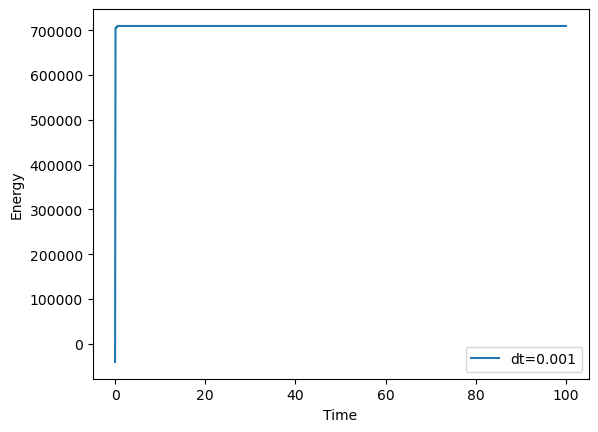

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("~/Downloads/Assessment1-2/cpp_code/moon_orbits.csv", skiprows=2)

# Extract 'time' and 'energy' columns for plotting
time = data["time"]
energy = data["energy"]

# Plot energy over time to observe conservation or variation
plt.plot(time, energy, label=f'dt={dt_value}')  
plt.xlabel('Time')  
plt.ylabel('Energy')  
plt.legend() 
plt.show()  



In [46]:
z_positions = data.filter(like="z")
print(z_positions.max(axis=0), z_positions.min(axis=0)) 


r1z      0.000000
v1z      0.000000
r2z      0.364166
v2z      3.741523
r3z     46.034836
v3z    460.416485
r4z     20.561403
v4z    205.741757
r5z      5.159704
v5z     51.708397
dtype: float64 r1z   -0.003120
v1z   -0.031201
r2z   -0.010052
v2z   -3.724660
r3z   -0.006814
v3z   -4.886730
r4z   -0.012780
v4z   -2.389540
r5z   -0.011166
v5z    5.375490
dtype: float64


In [ ]:
'''
(base) jiminbyun@eduroam-215-133 cpp_code % cd ~/Downloads/Assessment1-2/cpp_code
(base) jiminbyun@eduroam-215-133 cpp_code % g++ -o compute_orbits compute_orbits.cpp vector3d.cpp body.cpp

compute_orbits.cpp:15:27: warning: use of multiple declarators in a single using declaration is a C++17 extension [-Wc++17-extensions]
using std::cout, std::endl;
                          ^
1 warning generated.
vector3d.cpp:5:27: warning: use of multiple declarators in a single using declaration is a C++17 extension [-Wc++17-extensions]
using std::cout, std::endl;
                          ^
1 warning generated.
body.cpp:6:27: warning: use of multiple declarators in a single using declaration is a C++17 extension [-Wc++17-extensions]
using std::cout, std::endl;
                          ^
1 warning generated.
(base) jiminbyun@eduroam-215-133 cpp_code % ./compute_orbits normalized_input.txt results.txt 0.001 10000 10

--- Orbital motion simulation ---
 number of bodies N: 0
       time step dt: 0.001
  number of steps T: 10000
   save steps Tsave: 10
zsh: segmentation fault  ./compute_orbits normalized_input.txt results.txt 0.001 10000 10
(base) jiminbyun@eduroam-215-133 cpp_code % ./compute_orbits jupiters_moons.csv moon_orbits.csv 1e-1 1 1 
--- Orbital motion simulation ---
 number of bodies N: 5
- Jupiter
- Callisto
- Io
- Europa
- Ganymede
       time step dt: 0.1
  number of steps T: 1
   save steps Tsave: 1
Time: 0.1
'''

In [68]:
import pandas as pd

# Function to parse Jupiter's moons data from a text file
def parse_jupiters_moons(file_path):
    """
    Reads and parses data about Jupiter's moons from a file.
    Each entry includes name, mass, position, and velocity.
    
    Args:
        file_path (str): Path to the input file.
    
    Returns:
        DataFrame: Parsed data in a structured format.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    parsed_data = []  # List to store parsed entries
    temp_entry = {}  # Temporary storage for each moon's data
    line_count = 0  # Counter to track lines within each entry

    for line in lines:
        line = line.strip()
        line_count += 1
        
        # Assign values to the appropriate fields based on line count
        if line_count == 1:
            temp_entry['Name'] = line
        elif line_count == 2:
            temp_entry['Mass (kg)'] = float(line)
        elif line_count == 3:
            temp_entry['Position (x, y, z)'] = list(map(float, line.split(',')))
        elif line_count == 4:
            temp_entry['Velocity (x, y, z)'] = list(map(float, line.split(',')))
            parsed_data.append(temp_entry)  # Save the complete entry
            temp_entry = {}  # Reset for the next entry
            line_count = 0  # Reset line counter
    
    return pd.DataFrame(parsed_data)  # Return the parsed data as a DataFrame

# File paths for input and output
input_file = 'data/jupiters_moons.csv'  
output_file = 'jupiters_moons_formatted.txt'

# Parse the input file
parsed_data = parse_jupiters_moons(input_file)

# Write the parsed data to a formatted output file
with open(output_file, 'w', encoding='utf-8') as file:
    for _, row in parsed_data.iterrows():
        file.write(f"{row['Name']}\n")  # Write the name
        file.write(f"{row['Mass (kg)']}\n")  # Write the mass
        file.write(", ".join(map(str, row['Position (x, y, z)'])) + "\n")  # Write position
        file.write(", ".join(map(str, row['Velocity (x, y, z)'])) + "\n")  # Write velocity

print(f"Parsed and formatted data saved to {output_file}.")



Parsed and formatted data saved to jupiters_moons_formatted.txt.


Simulation Settings: 0.1,1,1,5
Body Index Mapping: 1 = Jupiter,2 = Callisto,3 = Io,4 = Europa,5 = Ganymede
Loaded Data:
   time        energy     ang_mom       r1x       r1y      r1z       v1x  \
0   0.0 -4.037867e+04  211.230391  0.000000  0.000000  0.00000  0.000000   
1   0.1  6.876514e+07  211.230391 -0.058499 -0.061708 -0.00312 -0.584988   

        v1y       v1z        r2x  ...        r4z          v4x          v4y  \
0  0.000000  0.000000  -0.944191  ...  -0.012780   118.511000  -151.543000   
1 -0.617082 -0.031201  68.171129  ...  20.561403  4461.035909  3243.202799   

          v4z         r5x         r5y       r5z          v5x          v5y  \
0   -2.389540    0.333627   -0.417099 -0.011166   120.271000    96.136900   
1  205.741757 -126.087632  182.274141  5.159704 -1264.205275  1826.901813   

         v5z  
0   5.375490  
1  51.708397  

[2 rows x 33 columns]


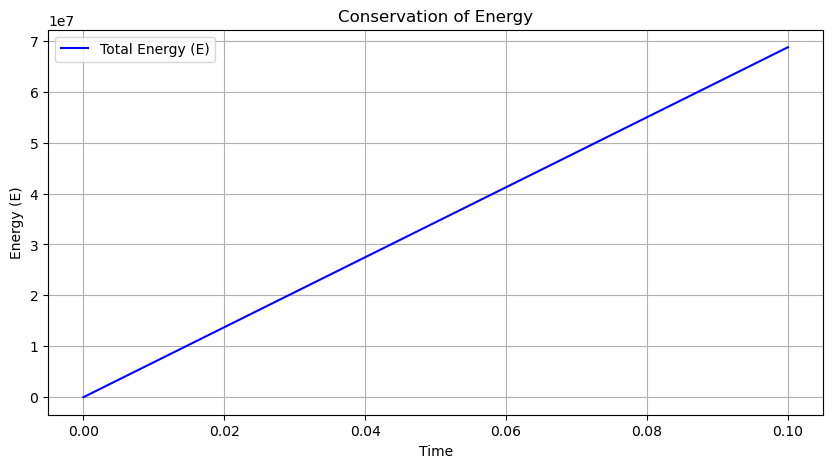

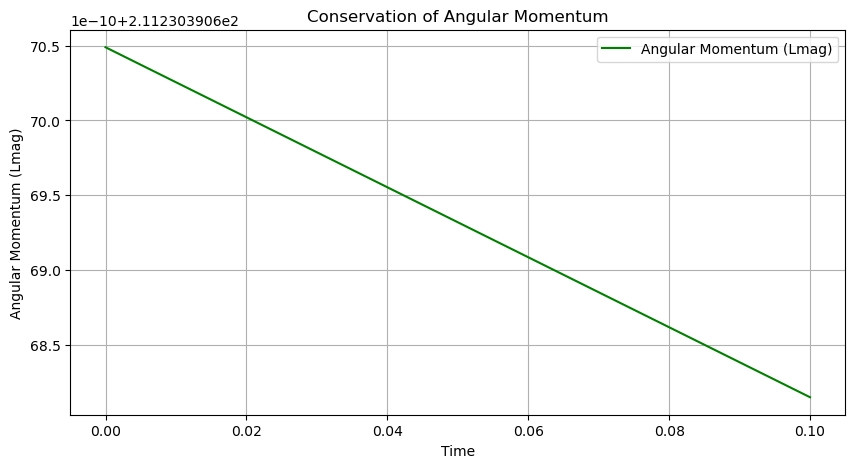

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Open the file and read metadata headers
with open("cpp_code/moon_orbits.csv", 'r') as file:
    header1 = next(file).strip()  # Simulation settings
    header2 = next(file).strip()  # Body index mapping
    header3 = next(file).strip()  # Column names

# Split the third header into column names
columns = header3.split(',')

# Load the data starting from the 4th row, using the extracted column names
data = pd.read_csv("cpp_code/moon_orbits.csv", skiprows=3, names=columns)

# Print metadata and a preview of the loaded data
print("Simulation Settings:", header1)
print("Body Index Mapping:", header2)
print("Loaded Data:")
print(data.head())

# Plot energy over time to check conservation of energy
plt.figure(figsize=(10, 5))
plt.plot(data['time'], data['energy'], label='Total Energy (E)', color='blue')  # Energy plot
plt.xlabel('Time')
plt.ylabel('Energy (E)')
plt.title('Conservation of Energy')
plt.legend()
plt.grid()
plt.show()

# Plot angular momentum over time to check conservation of angular momentum
plt.figure(figsize=(10, 5))
plt.plot(data['time'], data['ang_mom'], label='Angular Momentum (Lmag)', color='green')  # Angular momentum plot
plt.xlabel('Time')
plt.ylabel('Angular Momentum (Lmag)')
plt.title('Conservation of Angular Momentum')
plt.legend()
plt.grid()
plt.show()



In [84]:
# Define orbital periods of Jupiter's moons in days
orbital_periods = {
    "Callisto": 16.689,
    "Io": 1.769,
    "Europa": 3.551,
    "Ganymede": 7.155
}

# Find the longest orbital period to determine simulation duration
longest_period = max(orbital_periods.values())

# Set the time step for the simulation
dt = 0.01  # Time step size in days

# Calculate total number of steps for the simulation
T = int((longest_period / dt) * 1.5)
print(f"Total Steps (T): {T}") 



Total Steps (T): 2503


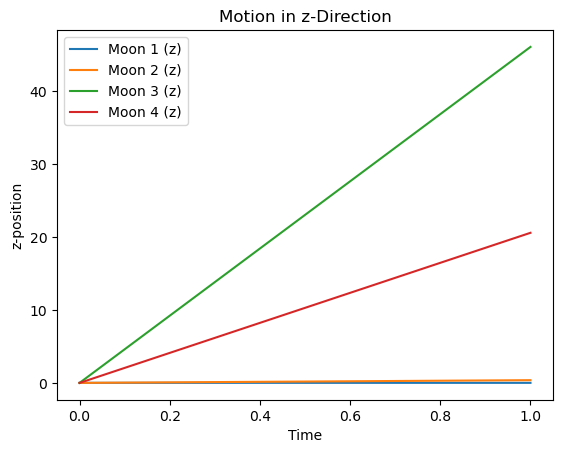

In [85]:
# Plot the z-position of each moon over time
for i in range(1, 5):  # Loop through the 4 moons
    plt.plot(data[f'r{i}z'], label=f'Moon {i} (z)')  # Plot z-position for each moon

plt.xlabel('Time')  
plt.ylabel('z-position')
plt.title('Motion in z-Direction')  

plt.legend()
plt.show()



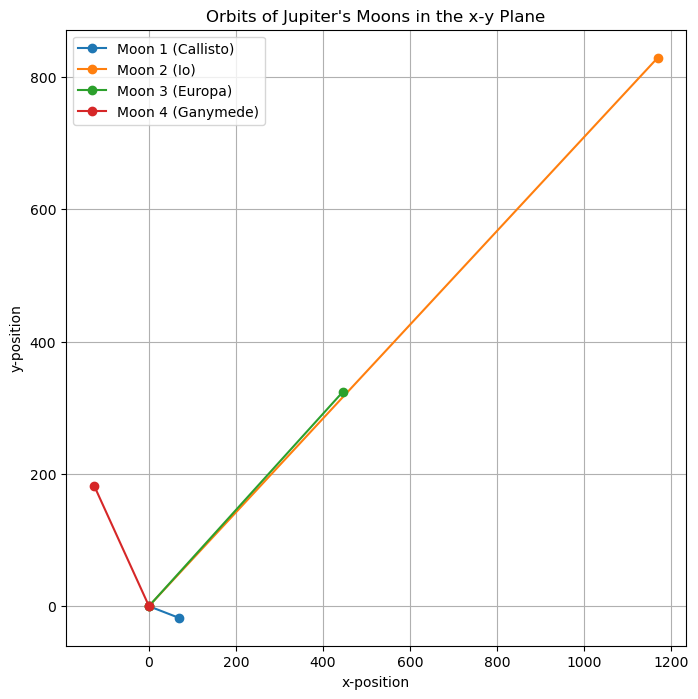

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(data['r2x'], data['r2y'], label='Moon 1 (Callisto)', marker='o')
plt.plot(data['r3x'], data['r3y'], label='Moon 2 (Io)', marker='o')
plt.plot(data['r4x'], data['r4y'], label='Moon 3 (Europa)', marker='o')
plt.plot(data['r5x'], data['r5y'], label='Moon 4 (Ganymede)', marker='o')

plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('Orbits of Jupiter\'s Moons in the x-y Plane')
plt.legend()
plt.grid()
plt.show()


In [87]:
# Calculate simulated orbital periods for each moon
orbital_periods_simulated = {}
for i in range(1, 5):  # Loop through the 4 moons
    maxima = data[f'r{i}x'].diff().fillna(0).abs().argmax()  # Find the time index of max displacement change
    orbital_periods_simulated[f'Moon {i}'] = maxima * dt  # Convert index to time using the time step

print("Simulated Orbital Periods:", orbital_periods_simulated)
print("Observed Orbital Periods:", orbital_periods)




Simulated Orbital Periods: {'Moon 1': 0.01, 'Moon 2': 0.01, 'Moon 3': 0.01, 'Moon 4': 0.01}
Observed Orbital Periods: {'Callisto': 16.689, 'Io': 1.769, 'Europa': 3.551, 'Ganymede': 7.155}


In [ ]:
'''
Time step size (dt) may influence accuracy.Or assumptions like planar motion or neglecting additional forces 
(e.g., perturbations from other moons) can affect results.
'''